In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.svm import SVC

In [109]:
bank=pd.read_csv(r"C:\Users\Mano\Desktop\bank.csv",sep=';')

In [110]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [139]:
bank['y'].value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

In [140]:
y1 = bank['y']

In [141]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,unknown,0,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,no,2,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,no,0,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,no,0,2,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


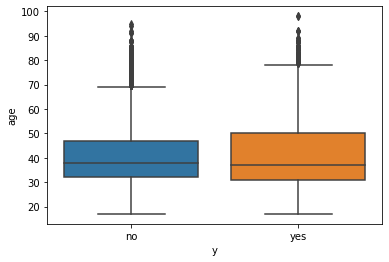

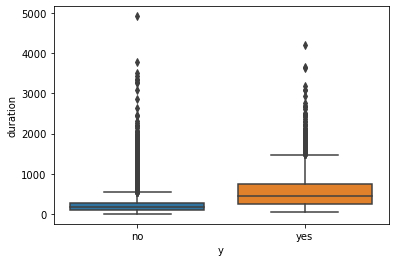

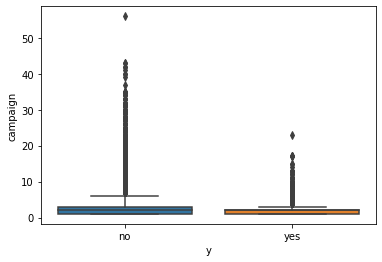

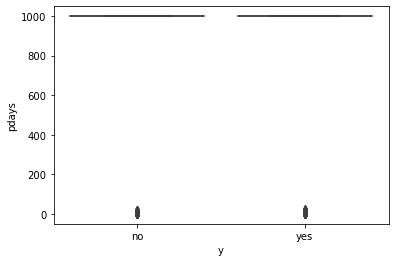

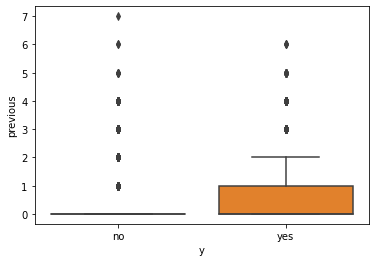

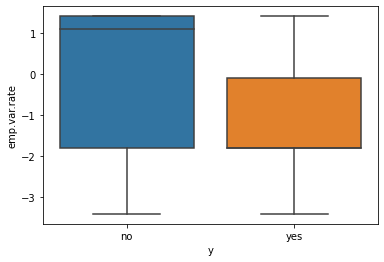

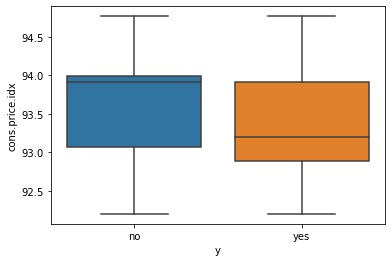

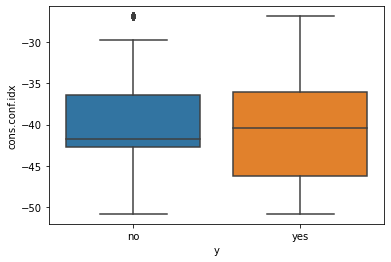

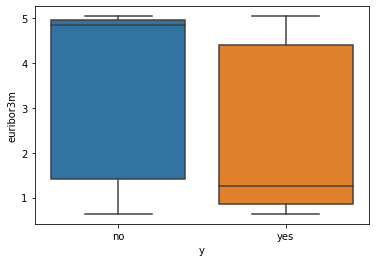

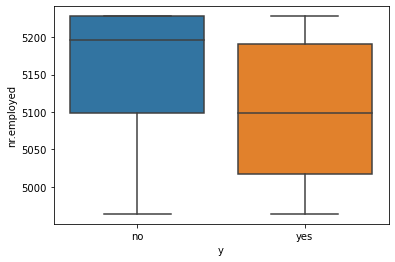

In [143]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = bank)
  plt.show();

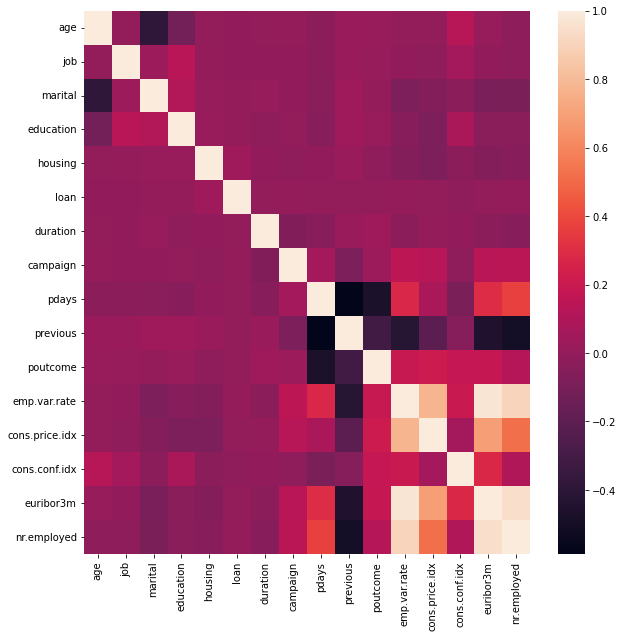

In [145]:
plt.figure(figsize = (10,10))
sns.heatmap(bank.corr())
plt.show()

In [146]:
catvar=[i for i in bank.columns if i not in num_var]


In [147]:
y1 = y1.values

In [148]:

bank1 = pd.get_dummies(bank)

In [149]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  int32  
 2   marital            41188 non-null  int32  
 3   education          41188 non-null  int32  
 4   housing            41188 non-null  int32  
 5   loan               41188 non-null  int32  
 6   duration           41188 non-null  int64  
 7   campaign           41188 non-null  int64  
 8   pdays              41188 non-null  int64  
 9   previous           41188 non-null  int64  
 10  poutcome           41188 non-null  int32  
 11  emp.var.rate       41188 non-null  float64
 12  cons.price.idx     41188 non-null  float64
 13  cons.conf.idx      41188 non-null  float64
 14  euribor3m          41188 non-null  float64
 15  nr.employed        41188 non-null  float64
 16  default_no         411

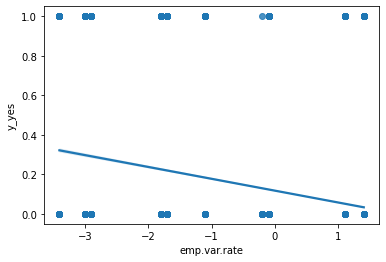

In [151]:
ax = sns.regplot(x="emp.var.rate", y="y_yes", order=1, data=bank1, truncate=True)

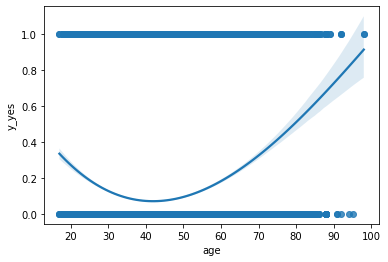

In [152]:
sns.regplot(x="age", y="y_yes", order=3, data=bank1, truncate=True);

In [154]:
y_yes1 = bank1['y_yes']
y_no1 = bank1['y_no']

bank1.drop('y_yes',axis = 1,inplace = True)
bank1.drop('y_no',axis = 1,inplace = True)

In [156]:
forest = RandomForestClassifier(n_estimators=350,
                                random_state=0)
forest.fit(bank1,y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [159]:
print("Feature ranking:")
for f in range(bank1.shape[1]):
    print("%d. %s: %f " % (f + 1, bank1.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration: 0.312926 
2. euribor3m: 0.097514 
3. age: 0.092160 
4. nr.employed: 0.055504 
5. job: 0.048985 
6. education: 0.043936 
7. campaign: 0.042560 
8. pdays: 0.032537 
9. poutcome: 0.028558 
10. cons.conf.idx: 0.024625 
11. marital: 0.024131 
12. emp.var.rate: 0.022888 
13. housing: 0.020677 
14. cons.price.idx: 0.020404 
15. loan: 0.014909 
16. previous: 0.014470 
17. day_of_week_mon: 0.010895 
18. day_of_week_thu: 0.010597 
19. day_of_week_wed: 0.010175 
20. day_of_week_tue: 0.010079 
21. day_of_week_fri: 0.009848 
22. contact_cellular: 0.006379 
23. contact_telephone: 0.006035 
24. default_no: 0.005674 
25. default_unknown: 0.005559 
26. month_oct: 0.005485 
27. month_mar: 0.004213 
28. month_may: 0.004123 
29. month_apr: 0.003073 
30. month_jun: 0.002343 
31. month_jul: 0.002324 
32. month_aug: 0.002148 
33. month_nov: 0.001828 
34. month_sep: 0.001825 
35. month_dec: 0.000615 
36. default_yes: 0.000000 


<Figure size 432x288 with 0 Axes>

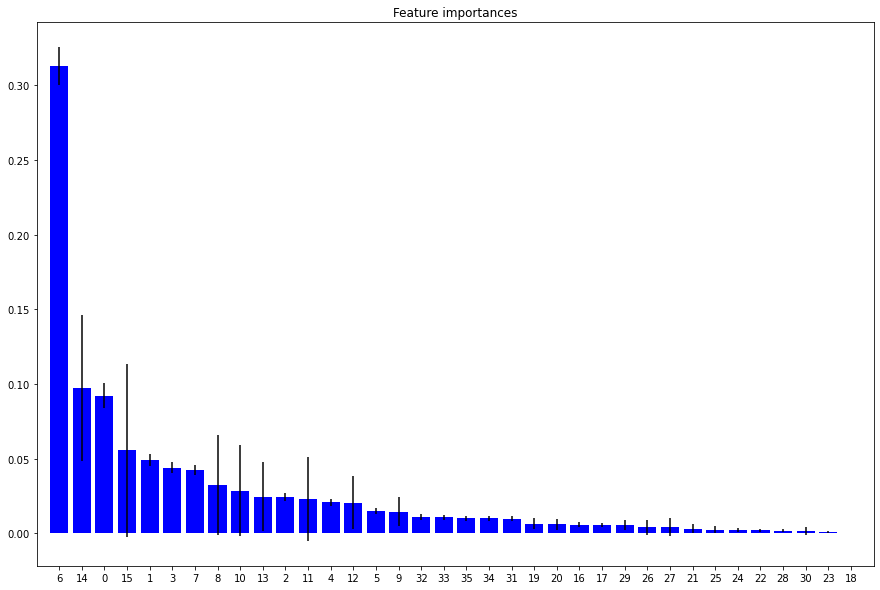

In [160]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(bank1.shape[1]), importances[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(bank1.shape[1]), indices)
plt.xlim([-1, bank1.shape[1]])
plt.show();

In [162]:
X_train, X_test, y_train, y_test = train_test_split(bank1, y1, test_size=0.2, random_state=1, stratify=y1)

In [163]:
for i in range(10,300,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    print(accuracy_score(knn.predict(X_test),y_test))


0.9094440398154892
0.9123573682932751
0.9128429230395727
0.9135712551590192
0.9139354212187424
0.9133284777858703
0.9140568099053168
0.913814032532168
0.9141781985918912
0.9141781985918912
0.9139354212187424
0.9130857004127215
0.9132070890992959
0.9134498664724447
0.9134498664724447
0.9126001456664239
0.9130857004127215
0.9130857004127215
0.9127215343529983
0.9129643117261471
0.9124787569798495
0.911750424860403
0.9121145909201263
0.9127215343529983
0.9126001456664239
0.9128429230395727
0.9126001456664239
0.9121145909201263
0.9122359796067007


In [164]:
t = pd.DataFrame()
t['y_yes'] = y_yes1
t['y_no'] = y_no1
t.head()

,y_yes,y_no
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [166]:
print("For age upto 30")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(bank1[(bank1['age'] <= 30) & (bank1['campaign']==i) & (t['y_yes']==1)].shape[0])
    den = 1+float(bank1[(bank1['age'] <= 30) & (bank['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 30
Nth Call 	 Efficiency
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [167]:
total_calls = sum(bank1['campaign'])
print(total_calls)

105754


In [168]:
extra_calls = sum(bank1[bank1['campaign']>6]['campaign']) - 6*bank1[bank1['campaign']>6].shape[0]
print(extra_calls)

12040


In [169]:
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [170]:
total_sales=float(t[t['y_yes']==1].shape[0])
print(total_sales)

4640.0
